<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/work_from_here/Advance_Decline%20Nifty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --q

[*********************100%***********************]  50 of 50 completed
[*********************100%***********************]  1 of 1 completed


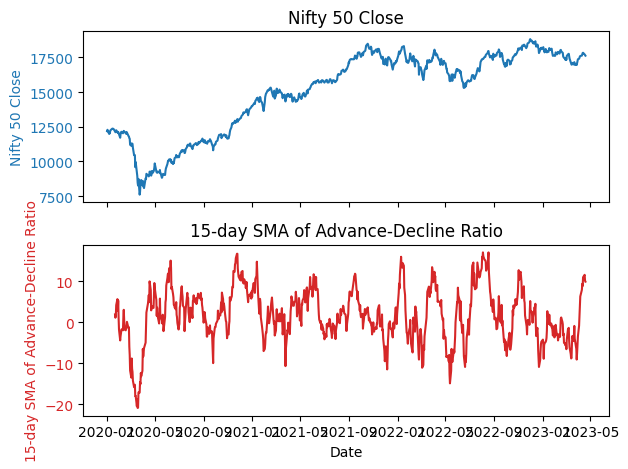

In [8]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch Nifty 50 constituents
nifty50_url = "https://archives.nseindia.com/content/indices/ind_nifty50list.csv"
nifty50 = pd.read_csv(nifty50_url)
tickers = nifty50['Symbol'].apply(lambda x: x + ".NS").tolist()

# Fetch historical data
start_date = "2020-01-01"
data = yf.download(tickers, start=start_date)['Adj Close']

# Calculate daily close price changes
daily_changes = data.diff()

# Calculate advancing and declining stocks
advancing_stocks = (daily_changes > 0).sum(axis=1)
declining_stocks = (daily_changes < 0).sum(axis=1)

# Calculate advance-decline ratio
advance_decline_ratio = advancing_stocks - declining_stocks



# Fetch Nifty 50 index data
nifty50_data = yf.download("^NSEI", start=start_date)['Adj Close']



In [17]:
# Calculate 15-day SMA of advance-decline ratio
sma_15d_ad_ratio = advance_decline_ratio.rolling(window=30).mean()

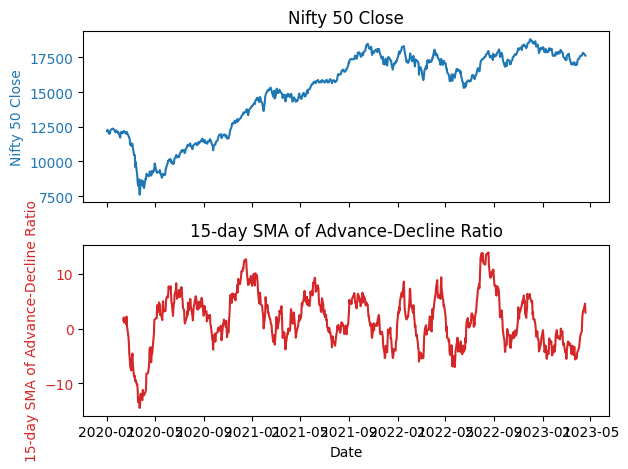

In [18]:
# Plot Nifty 50 close and 15-day SMA of advance-decline ratio in two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.set_ylabel('Nifty 50 Close', color='tab:blue')
ax1.plot(nifty50_data.index, nifty50_data, color='tab:blue', label='Nifty 50 Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Nifty 50 Close')

ax2.set_xlabel('Date')
ax2.set_ylabel('15-day SMA of Advance-Decline Ratio', color='tab:red')
ax2.plot(sma_15d_ad_ratio.index, sma_15d_ad_ratio, color='tab:red', label='15-day SMA of Advance-Decline Ratio')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_title('15-day SMA of Advance-Decline Ratio')

fig.tight_layout()
plt.show()


[]

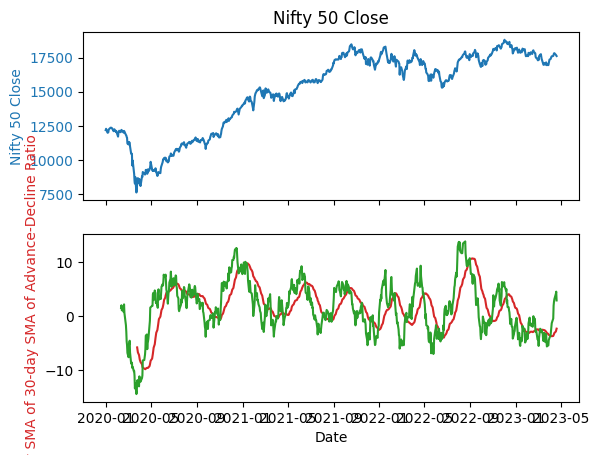

In [20]:
# Calculate 10-day SMA of 15-day SMA of advance-decline ratio
sma_10d_of_15d_ad_ratio = sma_15d_ad_ratio.rolling(window=30).mean()

# Plot Nifty 50 close and 10-day SMA of 15-day SMA of advance-decline ratio in two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.set_ylabel('Nifty 50 Close', color='tab:blue')
ax1.plot(nifty50_data.index, nifty50_data, color='tab:blue', label='Nifty 50 Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Nifty 50 Close')

ax2.set_xlabel('Date')
ax2.set_ylabel('30-day SMA of 30-day SMA of Advance-Decline Ratio', color='tab:red')
ax2.plot(sma_10d_of_15d_ad_ratio.index, sma_10d_of_15d_ad_ratio, color='tab:red', label='30-day SMA of 30-day SMA of Advance-Decline Ratio')
ax2.plot(sma_15d_ad_ratio.index, sma_15d_ad_ratio, color='tab:green', label='30-day SMA of Advance-Decline Ratio')
plt.plot()